# 中美，墨美汇率GARCH模型


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model
from scipy.stats import norm


## 中美汇率未来一年波动曲线+年均波动

/var/folders/wf/2hqzbd4s38bcm2srk_m3g8780000gn/T/ipykernel_46089/2853540153.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = yf.download(fx_pair, start="2015-01-01", end="2025-10-10")['Close']
[*********************100%***********************]  1 of 1 completed


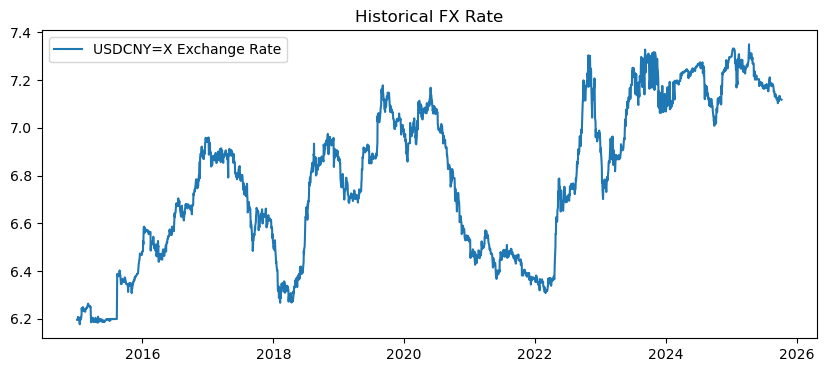

/opt/homebrew/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09209. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


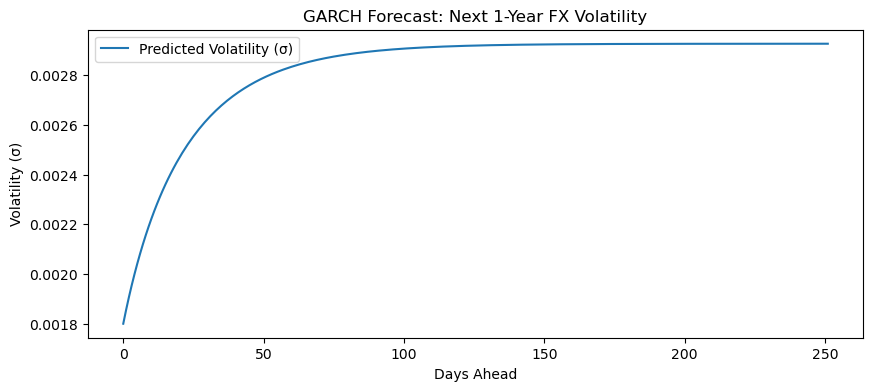

Annualized Volatility ≈ 4.48%


In [3]:

fx_pair = 'USDCNY=X'
fx_data = yf.download(fx_pair, start="2015-01-01", end="2025-10-10")['Close']
fx_data = fx_data.dropna()
fx_data.name = "FXRate"

# 计算日收益率
returns = fx_data.pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(fx_data, label=f'{fx_pair} Exchange Rate')
plt.title("Historical FX Rate")
plt.legend()
plt.show()

# ==============================
# Step 2️⃣ 使用 GARCH 模型预测波动率 
# ==============================

model = arch_model(returns * 100, vol='Garch', p=1, q=1, mean='constant')
fit = model.fit(disp="off")

forecast = fit.forecast(horizon=252,reindex=False)

sigma_row = forecast.variance.iloc[-1]          # Series, len=252, index: h.1..h.252
sigma_forecast = np.sqrt(sigma_row.to_numpy()) / 100  # ndarray shape (252,)  # 转回小数形式


plt.figure(figsize=(10,4))
plt.plot(sigma_forecast, label='Predicted Volatility (σ)')
plt.title("GARCH Forecast: Next 1-Year FX Volatility")
plt.xlabel("Days Ahead")
plt.ylabel("Volatility (σ)")
plt.legend()
plt.show()
# 年化波动率 = 日均波动率 × sqrt(252)
annualized_vol = np.mean(sigma_forecast) * np.sqrt(252)
print(f"Annualized Volatility ≈ {annualized_vol:.2%}")


## 墨美汇率未来一年波动曲线图及年均波动

/var/folders/wf/2hqzbd4s38bcm2srk_m3g8780000gn/T/ipykernel_46089/1145006794.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = yf.download(fx_pair, start="2015-01-01", end="2025-10-10")['Close']
[*********************100%***********************]  1 of 1 completed


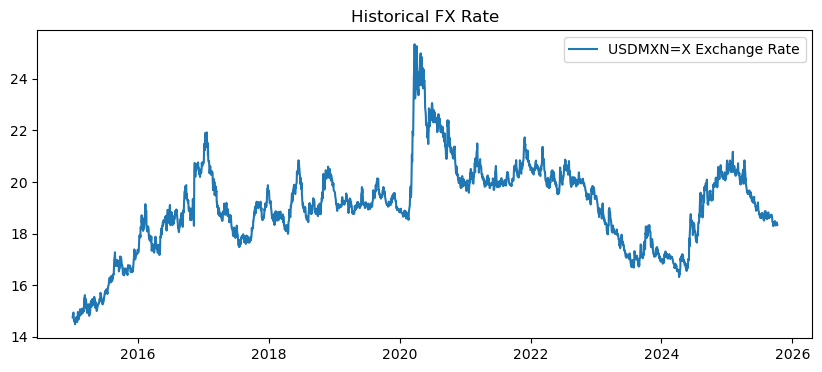

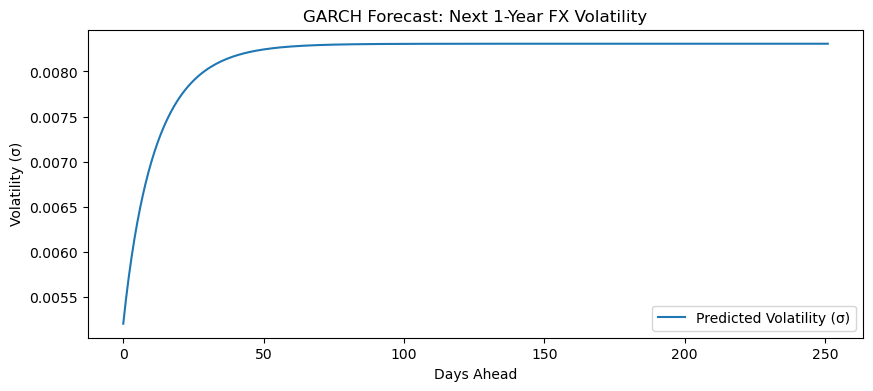

Annualized Volatility ≈ 12.94%


In [4]:
fx_pair = 'USDMXN=X'
fx_data = yf.download(fx_pair, start="2015-01-01", end="2025-10-10")['Close']
fx_data = fx_data.dropna()
fx_data.name = "FXRate"

# 计算日收益率
returns = fx_data.pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(fx_data, label=f'{fx_pair} Exchange Rate')
plt.title("Historical FX Rate")
plt.legend()
plt.show()

# ==============================
# Step 2️⃣ 使用 GARCH 模型预测波动率 \sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2 + \beta \sigma_{t-1}^2
# ==============================

model = arch_model(returns * 100, vol='Garch', p=1, q=1, mean='constant')
fit = model.fit(disp="off")

# 预测未来波动率（例如未来一年 = 252个交易日）
forecast = fit.forecast(horizon=252,reindex=False)


# ✅ 正确取法：取最后一行（起点）的 252 个步长预测，并转为 numpy
sigma_row = forecast.variance.iloc[-1]          # Series, len=252, index: h.1..h.252
sigma_forecast = np.sqrt(sigma_row.to_numpy()) / 100  # ndarray shape (252,)  # 转回小数形式


plt.figure(figsize=(10,4))
plt.plot(sigma_forecast, label='Predicted Volatility (σ)')
plt.title("GARCH Forecast: Next 1-Year FX Volatility")
plt.xlabel("Days Ahead")
plt.ylabel("Volatility (σ)")
plt.legend()
plt.show()
# 年化波动率 = 日均波动率 × sqrt(252)
annualized_vol = np.mean(sigma_forecast) * np.sqrt(252)
print(f"Annualized Volatility ≈ {annualized_vol:.2%}")